In [1]:
# Daniel Bandala @ mar 2022
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Support vector machine classifier
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.A support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier.

In [2]:
# define classifier
clf = svm.SVC(kernel='rbf',probability=False,class_weight='balanced',random_state=1)

In [3]:
# visualize support vectors from classifier
def graphSupportVectors(X,y,clf):
    plt.figure(figsize=(8,8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(
        XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    )
    # plot support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.show()

## Circle class

In [4]:
def generateCirclePoints(radius,center,points=1200):
    size = 2*center
    circle_pts = np.zeros((points,3))
    non_circle_pts = np.zeros((points,3))
    center_vector = [center,center]
    for i in range(points):
        # random angle
        alpha = 2 * math.pi * random.random()
        # random radius
        r = radius * math.sqrt(random.random())
        # calculating coordinates circle
        x_c = r * math.cos(alpha) + center
        y_c = r * math.sin(alpha) + center
        circle_pts[i] = [x_c,y_c,1]
        # calculating coordinates non circle
        x_nc = (size/2)*random.random() if random.randint(0,1)==1 else (size/2)*(random.random()+1)
        num1 = radius**2
        num2 = (x_nc-center)**2
        if num2>num1:
            y_nc = size*random.random()
        else:
            y_down = center-math.sqrt(num1-num2)
            y_nc = y_down*random.random() if random.randint(0,1)==1 else (size-y_down*random.random())
        non_circle_pts[i] = [x_nc,y_nc,0]
    return np.r_[circle_pts,non_circle_pts]

In [15]:
circle_pts = generateCirclePoints(90,100)

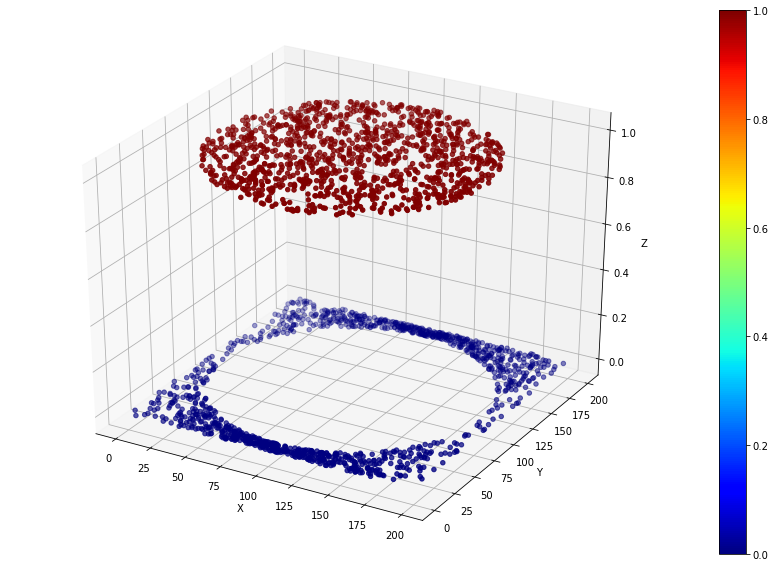

In [16]:
# graph circle points
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(circle_pts[:,0],circle_pts[:,1],circle_pts[:,2],c=circle_pts[:,2],cmap="jet")
fig.colorbar(img)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [17]:
# prepare data
X = circle_pts[:,:2]
y = circle_pts[:,2]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,shuffle=True)
# fit model
clf.fit(X_train,y_train)

SVC(class_weight='balanced', random_state=1)

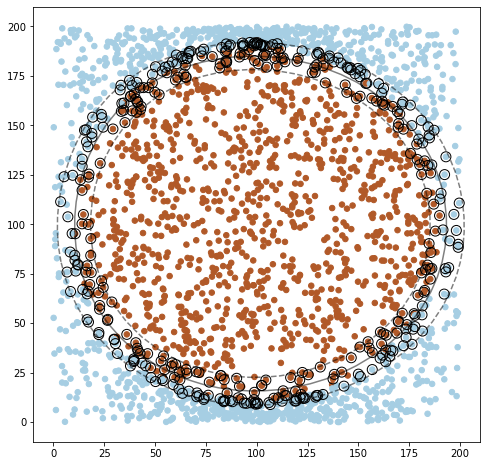

In [18]:
graphSupportVectors(X,y,clf)

In [19]:
# make prediction
y_pred=clf.predict(X_test)

In [20]:
# confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[303,   2],
       [ 17, 278]])

Text(0.5, 257.44, 'Circle')

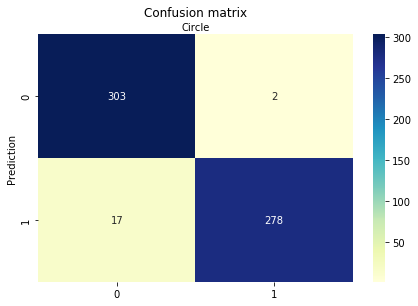

In [21]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Prediction')
plt.xlabel('Circle')

In [22]:
# performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy: 96.83333333333334
Precision: 99.28571428571429
Recall: 94.23728813559322


## Triangle class

In [23]:
def generateTrianglePoints(length,center,points=1200):
    size = 2*center
    triangle_pts = np.zeros((points,3))
    non_triangle_pts = np.zeros((points,3))
    center_vector = [center,center]
    # triangle geometry and location parameters
    m = math.sqrt(3)
    h = m*length/2
    a = center-length/2
    b = size-a
    c = center-h/2
    beta = center+h/2-2*h*center
    # three triangle points
    pt = [[center-length/2,center-h/2],[center,center+h/2],[center+length/2,center-h/2]]    
    for i in range(points):
        # random auxiliar points
        x_aux, y_aux = sorted([random.random(), random.random()])
        s, t, u = x_aux, y_aux - x_aux, 1 - y_aux
        x_t, y_t = (s*pt[0][0]+t*pt[1][0]+u*pt[2][0],s*pt[0][1]+t*pt[1][1]+u*pt[2][1])
        triangle_pts[i] = [x_t,y_t,1]
        # calculating coordinates non triangle
        x_nt = size*random.random()
        # check if outside the triangle
        if x_nt<a or x_nt>b:
            y_nt = size*random.random()
        else:
            ran_num = random.random()
            ran_int = random.randint(0,1)
            # check if before center
            if (x_nt<center):
                y_rect = m*(x_nt-center)+center+h/2
                y_nt = c*random.random() if ran_int==1 else y_rect+ran_num*(size-y_rect)
            else:
                y_rect = -m*(x_nt-center)+center+h/2
                y_nt = c*random.random() if ran_int==1 else y_rect+ran_num*(size-y_rect)
        non_triangle_pts[i] = [x_nt,y_nt,0]
    return np.r_[triangle_pts,non_triangle_pts]

In [24]:
triangle_pts = generateTrianglePoints(80,100)

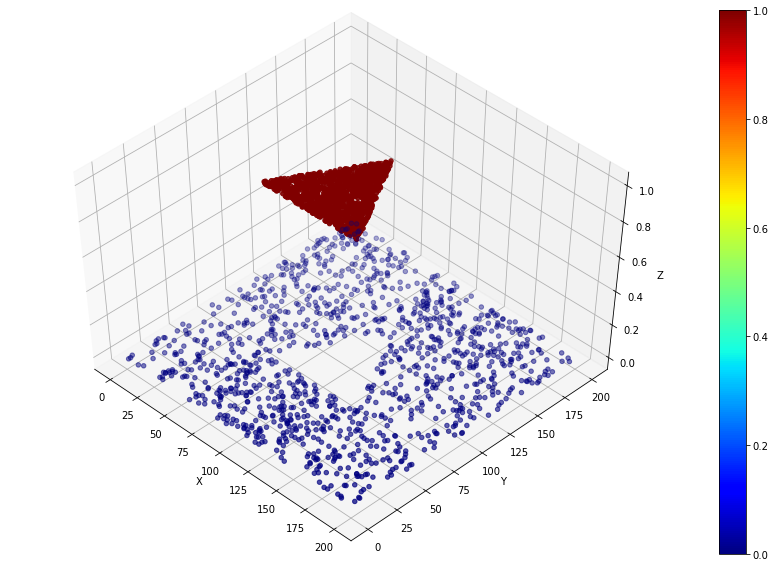

In [25]:
# graph triangle points class
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(triangle_pts[:,0],triangle_pts[:,1],triangle_pts[:,2],c=triangle_pts[:,2],cmap="jet")
fig.colorbar(img)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(50, -45)
plt.show()

In [26]:
# prepare data
X = triangle_pts[:,:2]
y = triangle_pts[:,2]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
# define classifier
clf = svm.SVC(kernel='rbf',probability=False,class_weight='balanced',random_state=1)
# fit model
clf.fit(X_train,y_train)

SVC(class_weight='balanced', random_state=1)

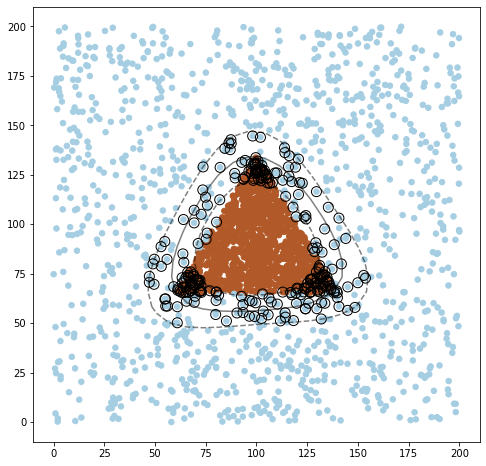

In [27]:
graphSupportVectors(X,y,clf)

In [28]:
# make prediction
y_pred=clf.predict(X_test)

In [29]:
# confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[287,  18],
       [  0, 295]])

Text(0.5, 257.44, 'Triangle')

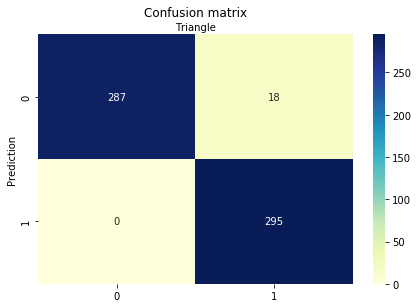

In [30]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Prediction')
plt.xlabel('Triangle')

In [31]:
# performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy: 97.0
Precision: 94.24920127795528
Recall: 100.0


# Square class

In [32]:
def generateSquarePoints(length,center,points=1200,max_iter=100000):
    size = 2*center
    square_pts = np.zeros((0,3))
    non_square_pts = np.zeros((0,3))
    # square region
    a = center-length
    b = center+length
    idx = 0
    while idx<max_iter and len(square_pts)<points and len(non_square_pts)<points:
        # random point
        x_t = 2*center*random.random()
        y_t = 2*center*random.random()
        if x_t>=a and x_t<=b and y_t>=a and y_t<=b:
            # square points
            square_pts = np.append(square_pts,np.array([[x_t,y_t,1]]),axis=0)
        else:
            non_square_pts = np.append(non_square_pts,np.array([[x_t,y_t,0]]),axis=0)
    return np.r_[square_pts,non_square_pts]

In [33]:
square_pts = generateSquarePoints(80,100)

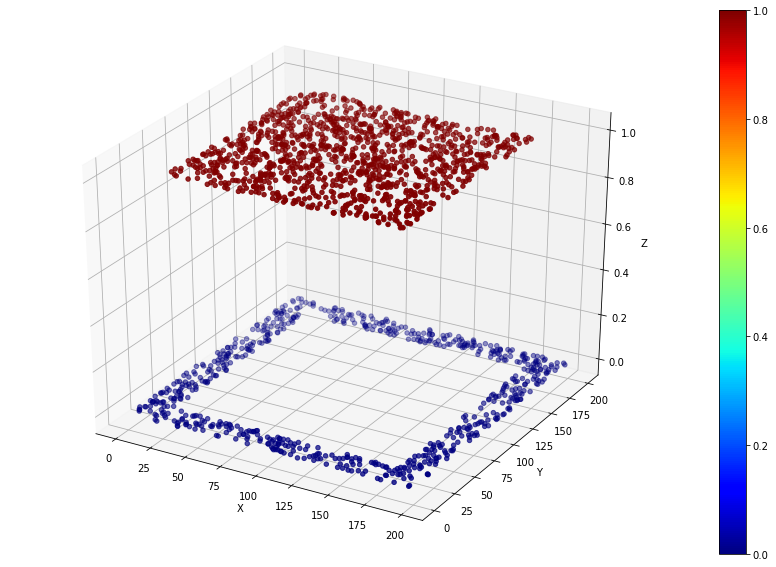

In [34]:
# graph square points class
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(square_pts[:,0],square_pts[:,1],square_pts[:,2],c=square_pts[:,2],cmap="jet")
fig.colorbar(img)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [35]:
# prepare data
X = square_pts[:,:2]
y = square_pts[:,2]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
# define classifier
clf = svm.SVC(kernel='rbf',probability=False,class_weight='balanced',random_state=1)
# fit model
clf.fit(X_train,y_train)

SVC(class_weight='balanced', random_state=1)

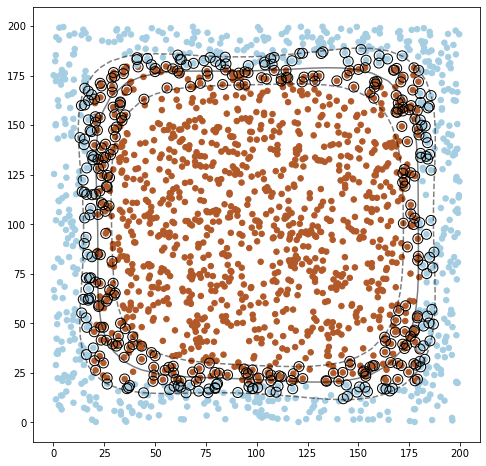

In [36]:
graphSupportVectors(X,y,clf)

In [37]:
# make prediction
y_pred=clf.predict(X_test)

In [38]:
# confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[181,   0],
       [ 20, 277]])

Text(0.5, 257.44, 'Square')

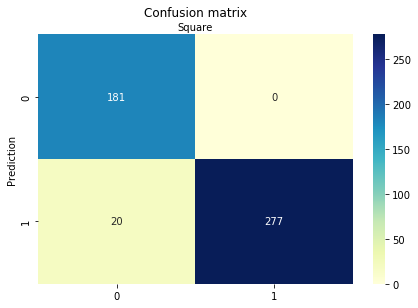

In [39]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Prediction')
plt.xlabel('Square')

In [40]:
# performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy: 95.81589958158996
Precision: 100.0
Recall: 93.26599326599326
